In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import glob 
from sklearn.metrics import classification_report
import random

In [2]:
path = glob.glob("d:/birds/*/*.jpg")

In [3]:
len(path)

160

In [18]:
# 查看第一张图片和最后一张图片的路径
path[:5],path[-5:]

(['d:/birds\\007.Parakeet_Auklet\\12.jpg',
  'd:/birds\\005.Crested_Auklet\\31.jpg',
  'd:/birds\\006.Least_Auklet\\25.jpg',
  'd:/birds\\008.Rhinoceros_Auklet\\15.jpg',
  'd:/birds\\008.Rhinoceros_Auklet\\29.jpg'],
 ['d:/birds\\005.Crested_Auklet\\19.jpg',
  'd:/birds\\005.Crested_Auklet\\12.jpg',
  'd:/birds\\005.Crested_Auklet\\18.jpg',
  'd:/birds\\006.Least_Auklet\\0.jpg',
  'd:/birds\\005.Crested_Auklet\\6.jpg'])

In [8]:
random.shuffle(path)

In [19]:
path[:5],path[-5:]

(['d:/birds\\007.Parakeet_Auklet\\12.jpg',
  'd:/birds\\005.Crested_Auklet\\31.jpg',
  'd:/birds\\006.Least_Auklet\\25.jpg',
  'd:/birds\\008.Rhinoceros_Auklet\\15.jpg',
  'd:/birds\\008.Rhinoceros_Auklet\\29.jpg'],
 ['d:/birds\\005.Crested_Auklet\\19.jpg',
  'd:/birds\\005.Crested_Auklet\\12.jpg',
  'd:/birds\\005.Crested_Auklet\\18.jpg',
  'd:/birds\\006.Least_Auklet\\0.jpg',
  'd:/birds\\005.Crested_Auklet\\6.jpg'])

In [10]:
# 打标签
labels = [int(p.split("\\")[1][2])-5 for p in path]
labels
    
    

[2,
 0,
 1,
 3,
 3,
 1,
 3,
 3,
 2,
 2,
 0,
 2,
 3,
 3,
 1,
 1,
 2,
 3,
 3,
 0,
 0,
 3,
 0,
 2,
 1,
 3,
 3,
 0,
 0,
 0,
 3,
 1,
 0,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 0,
 1,
 3,
 0,
 1,
 1,
 3,
 2,
 3,
 3,
 3,
 1,
 1,
 2,
 3,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 3,
 2,
 0,
 3,
 0,
 0,
 1,
 0,
 3,
 1,
 2,
 1,
 2,
 2,
 3,
 3,
 1,
 0,
 3,
 3,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 3,
 3,
 1,
 1,
 2,
 3,
 0,
 1,
 3,
 1,
 3,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 3,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 3,
 0,
 1,
 2,
 1,
 0,
 3,
 1,
 3,
 0,
 2,
 3,
 2,
 3,
 2,
 1,
 2,
 1,
 0,
 2,
 0,
 3,
 1,
 2,
 0,
 2,
 3,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0]

In [17]:
# labels = [p.split(".")[1].split("_")[0] for p in path]
labels = []
for p in path:
    if p.split(".")[1].split("_")[0]=="Parakeet":
        labels.append(0)
    elif p.split(".")[1].split("_")[0]=="Rhinoceros":
        labels.append(1)
    elif p.split(".")[1].split("_")[0]=="Crested":
        labels.append(2)
    else :
        labels.append(3)
        
        
    
labels

[0,
 2,
 3,
 1,
 1,
 3,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 3,
 3,
 0,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 3,
 1,
 1,
 2,
 2,
 2,
 1,
 3,
 2,
 0,
 1,
 1,
 3,
 0,
 0,
 0,
 2,
 3,
 1,
 2,
 3,
 3,
 1,
 0,
 1,
 1,
 1,
 3,
 3,
 0,
 1,
 3,
 3,
 0,
 0,
 2,
 3,
 0,
 1,
 0,
 2,
 1,
 2,
 2,
 3,
 2,
 1,
 3,
 0,
 3,
 0,
 0,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 3,
 0,
 3,
 3,
 3,
 2,
 2,
 1,
 1,
 3,
 3,
 0,
 1,
 2,
 3,
 1,
 3,
 1,
 3,
 0,
 3,
 0,
 3,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 3,
 0,
 0,
 2,
 0,
 3,
 1,
 2,
 3,
 0,
 3,
 2,
 1,
 3,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 3,
 0,
 3,
 2,
 0,
 2,
 1,
 3,
 0,
 2,
 0,
 1,
 3,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 3,
 2]

In [13]:
a = "d:/birds\\005.Crested_Auklet\\0.jpg"
a.split(".")[1].split("_")[0]

'Crested'

In [20]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image,channels=3)
    image = tf.image.resize(image,[256,256])
    image = image/255.0
    return image

TypeError: where() takes from 1 to 3 positional arguments but 5 were given

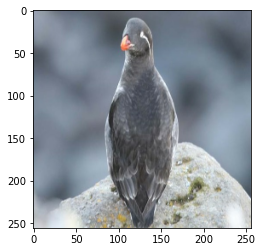

In [24]:
rr = random.randint(0,len(path))
path_ = path[rr]
plt.imshow(load_and_preprocess_image(path_))
# plt.axes("off")
print(rr,np.where(labels[rr]==1,"Parakeet","Rhinoceros","Crested","Least"))

In [25]:
train_val_count=int(len(path)*.85)  #取85%作为训练集与验证集数据
#含图片的路径的list转化为dataset，下同。方便后面用map函数将图片数据读入
train_val_img_path = tf.data.Dataset.from_tensor_slices(path[:train_val_count])    #转训练集与验证集
test_img_path=tf.data.Dataset.from_tensor_slices(path[train_val_count:])     #余下为测试集，转测试集

In [26]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_val_image_ds = train_val_img_path.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)   
#map，用load_and_preprocess_image函数遍历path_ds中每一个路径
#读入图片数据保存在image_ds，训练集图片

In [27]:
test_image_ds = test_img_path.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE) 
#map，用load_and_preprocess_image函数遍历path_ds中每一个路径
#读入图片数据保存在image_ds，测试集图片

In [30]:
#将训练集的标签转为dataset，方便后面用zip将图片与标签合并。zip（x,y）,x,y为同类型变量
train_val_label = tf.data.Dataset.from_tensor_slices(labels[:train_val_count])
#测试集标签仅在打印分类报告时使用，保持为list
test_label=labels[train_val_count:]

In [31]:
#将训练集、验证集的图片与对应的标签打包，方便后面验证集、训练集划分以及模型训练
train_val_image_label_ds = tf.data.Dataset.zip((train_val_image_ds, train_val_label))  

In [32]:
#取（训练集与验证集）中20%为为验证集的样本数量。
val_count = int(train_val_count*0.2)   
#训练集与验证集的样本数量减去验证集的样本数量，余下为训练集的样本数量
train_count = train_val_count - val_count  

In [33]:
val_count,train_count

(27, 109)

In [34]:
val_image_label_ds = train_val_image_label_ds.take(val_count)  #从image_label_ds中提取验证集数据
train_image_label_ds = train_val_image_label_ds.skip(val_count)  #提取余下的为训练集数据

In [35]:
train_image_label_ds,val_image_label_ds,test_image_ds  #查看

(<SkipDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>,
 <TakeDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>,
 <ParallelMapDataset element_spec=TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None)>)

In [36]:
BATCH_SIZE =32

In [37]:
train_data_r = train_image_label_ds.repeat()
train_data_r_b = train_data_r.batch(BATCH_SIZE)
train_data = train_data_r_b.prefetch(AUTOTUNE)

In [38]:
val_data = val_image_label_ds.batch(BATCH_SIZE)  
test_data = test_image_ds.batch(BATCH_SIZE)

In [39]:
train_data,val_data,test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>)

# 建立模型

In [67]:
model = tf.keras.Sequential()   #顺序模型
model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32,(3,3),padding="same",activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [68]:
# model=tf.keras.Sequential()
# model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),padding="same",activation='relu'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Conv2D(64,(3,3),padding="same",activation='relu'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Conv2D(1024,(3,3),padding="same",activation='relu'))
# model.add(tf.keras.layers.GlobalAveragePooling2D())
# model.add(tf.keras.layers.Dense(256,activation='relu'))
# model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_1 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 batch_normalization_2 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_1   (None, 32)               0         
 (GlobalAveragePooling2D)                                        
                                                      

In [70]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=['acc'])

In [71]:
steps_per_epoch = train_count//BATCH_SIZE

In [72]:
steps_per_epoch

3

In [73]:
history = model.fit(train_data, epochs=170, steps_per_epoch=steps_per_epoch, validation_data=val_data)

Epoch 1/170
3/3 [==============================] - 10s 3s/step - loss: 0.4110 - acc: 0.3021 - val_loss: 0.5169 - val_acc: 0.4074
Epoch 2/170
3/3 [==============================] - 9s 3s/step - loss: 0.1443 - acc: 0.2500 - val_loss: 0.4485 - val_acc: 0.4074
Epoch 3/170
3/3 [==============================] - 9s 3s/step - loss: 0.0182 - acc: 0.2500 - val_loss: 0.3855 - val_acc: 0.4074
Epoch 4/170
3/3 [==============================] - 9s 3s/step - loss: -0.1070 - acc: 0.2604 - val_loss: 0.3181 - val_acc: 0.4074
Epoch 5/170
3/3 [==============================] - 9s 3s/step - loss: -0.2653 - acc: 0.2500 - val_loss: 0.2524 - val_acc: 0.4074
Epoch 6/170
3/3 [==============================] - 9s 3s/step - loss: -0.2618 - acc: 0.2604 - val_loss: 0.1924 - val_acc: 0.4074
Epoch 7/170
3/3 [==============================] - 9s 3s/step - loss: -0.4442 - acc: 0.2396 - val_loss: 0.1431 - val_acc: 0.4074
Epoch 8/170
3/3 [==============================] - 9s 3s/step - loss: -0.5842 - acc: 0.2604 - val_l

In [74]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

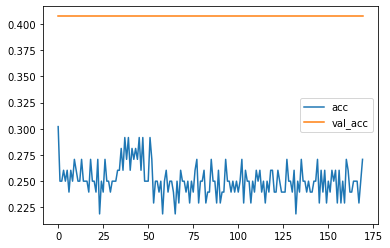

In [75]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

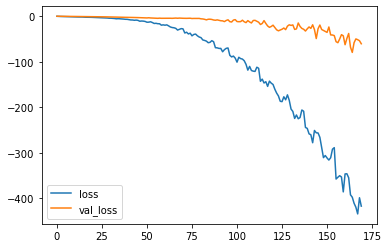

In [76]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

In [77]:
pred_prob=model.predict(test_data)  #预测1类的概率

1/1 [==============================] - 1s 1s/step


In [78]:
#模型预测的结果是该图像所属不同类别的概率，属于哪个类别的概率大就属于哪个类别（np.argmax）
pred_=np.argmax(pred_prob,axis=1)
pred_

In [79]:
from  sklearn.metrics import classification_report  

In [80]:
print(classification_report(test_label,pred_label))  #打印分类报告

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.08      1.00      0.15         2
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         5

    accuracy                           0.08        24
   macro avg       0.02      0.25      0.04        24
weighted avg       0.01      0.08      0.01        24



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
